# Title

In [1]:
# Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
import os 
import joblib

In [3]:
# Importing Dataset

In [4]:
df=pd.read_csv("fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [5]:
# shape of the dataset
df.shape

(17880, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [8]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']

# Fill missing values with empty string to keep columns
df[text_columns] = df[text_columns].fillna("")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text.lower())  # lowercase and remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
 
for col in text_columns:
    df[f'{col}_clean'] = df[col].apply(clean_text)


In [9]:
# Step 4: Combine Cleaned Text Fields
df['all_text'] = df[[f'{col}_clean' for col in text_columns]].agg(' '.join, axis=1)

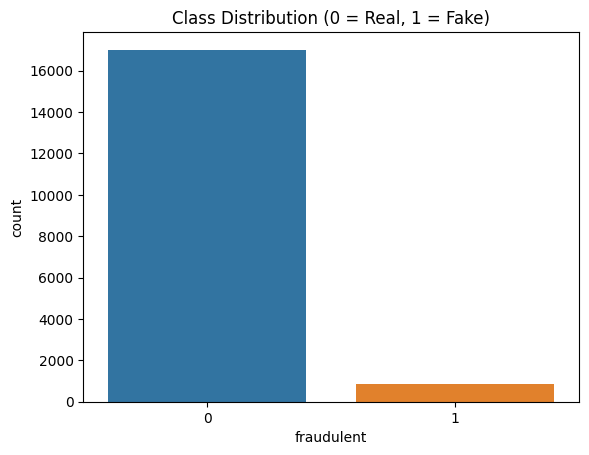

In [10]:
sns.countplot(x='fraudulent', data=df)
plt.title("Class Distribution (0 = Real, 1 = Fake)")
plt.show()

In [11]:
X = df['all_text']
y = df['fraudulent']

In [12]:
X

0        marketing intern food weve created groundbreak...
1        customer service cloud video production second...
2        commissioning machinery assistant cma valor se...
3        account executive washington dc passion improv...
4        bill review manager spotsource solution llc gl...
                               ...                        
17875    account director distribution vend looking awe...
17876    payroll accountant weblinc ecommerce platform ...
17877    project cost control staff engineer cost contr...
17878    graphic designer  nemsia studio looking experi...
17879    web application developer vend looking awesome...
Name: all_text, Length: 17880, dtype: object

In [13]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

In [14]:
tfidf = TfidfVectorizer()
X_vec = tfidf.fit_transform(X)

In [15]:
X_vec.shape

(17880, 151775)

In [16]:
# Splitting dataset into training and testing set

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

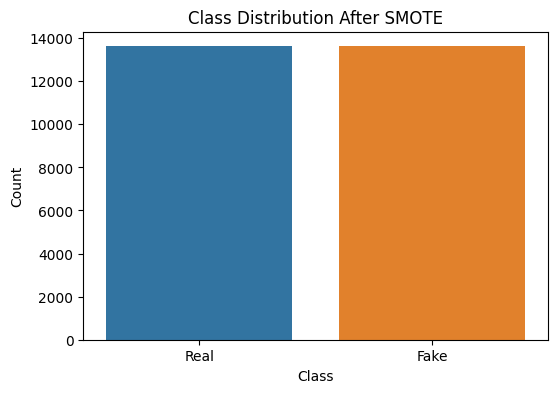

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_bal , data=df)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Real', 'Fake'])  # Adjust labels if needed
plt.show()

In [20]:
# Performance evaluation function

In [21]:
precision = []
recall = []
fscore = []
accuracy = []
labels=['Real','Fake']

def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

In [22]:
# Logistic Regression

Model loaded successfully.
Logistic Regression Accuracy    : 98.46196868008948
Logistic Regression Precision   : 92.45655080213903
Logistic Regression Recall      : 91.34451866980203
Logistic Regression FSCORE      : 91.8922094224003

 Logistic Regression classification report
               precision    recall  f1-score   support

        Real       0.99      0.99      0.99      3400
        Fake       0.83      0.86      0.85       176

    accuracy                           0.98      3576
   macro avg       0.91      0.92      0.92      3576
weighted avg       0.98      0.98      0.98      3576



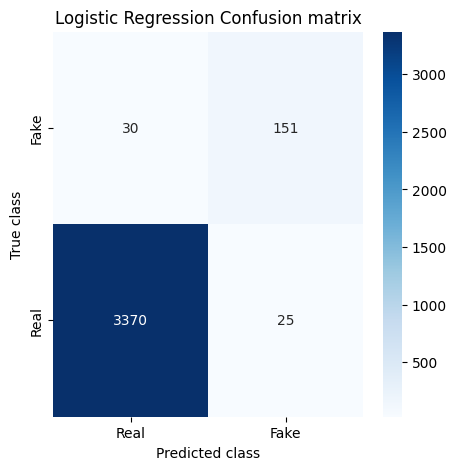

In [23]:
if os.path.exists('Logistic Regression.pkl'):
    # Load the trained model from the file
    clf = joblib.load('Logistic Regression.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_val)
    performance_metrics("Logistic Regression", predict, y_val)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = LogisticRegression()
    clf.fit(X_train_bal, y_train_bal)
    # Save the trained model to a file
    joblib.dump(clf, 'Logistic Regression.pkl')
    print("Model saved successfully.")
    predict = clf.predict(X_val)
    performance_metrics("Logistic Regression", predict, y_val)

In [24]:
#Random Forest Classifier

Model loaded successfully.
Random Forest Accuracy    : 98.09843400447427
Random Forest Precision   : 99.01819231879874
Random Forest Recall      : 81.21546961325967
Random Forest FSCORE      : 87.93960278774678

 Random Forest classification report
               precision    recall  f1-score   support

        Real       1.00      0.98      0.99      3463
        Fake       0.62      1.00      0.77       113

    accuracy                           0.98      3576
   macro avg       0.81      0.99      0.88      3576
weighted avg       0.99      0.98      0.98      3576



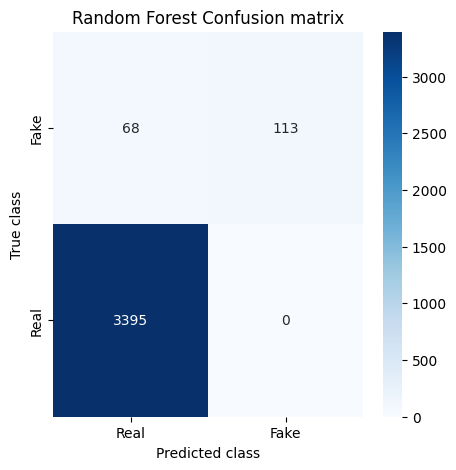

In [25]:
if os.path.exists('Random Forest.pkl'):
    # Load the trained model from the file
    rf = joblib.load('Random Forest.pkl')
    print("Model loaded successfully.")
    predict = rf.predict(X_val)
    performance_metrics("Random Forest", predict, y_val)
else:
    # Train the model (assuming X_train and y_train are defined)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_bal, y_train_bal)
    # Save the trained model to a file
    joblib.dump(rf, 'Random Forest.pkl')
    print("Model saved successfully.")
    predict = rf.predict(X_val)
    performance_metrics("Random Forest", predict, y_val)


In [26]:
# Prediction with new test data|

In [27]:
test=pd.read_csv('test.csv')
test

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,4709,Python Engineer,"GB, , London",NaN,NaN,NaN,Stylect is a dynamic startup that helps helps ...,We don’t care where you studied or what your G...,We are negotiable on salary and there is the p...,0,1,0,Full-time,Entry level,Unspecified,Apparel & Fashion,Information Technology
1,11080,Entry Level Sales,"US, OH, Cincinnati",NaN,55000-75000,NaN,General Summary: Achieves maximum sales profit...,NaN,Great Health and DentalFast Advancement Opport...,1,0,0,Full-time,Entry level,High School or equivalent,Financial Services,Sales
2,12358,Agile Project Manager,"US, NY, New York",NaN,NaN,ustwo offers you the opportunity to be yoursel...,"At ustwo™ you get to be yourself, whilst deliv...",Skills• Experience interfacing directly with c...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN
3,14512,Marketing Coordinator,"GB, GBN, London",Business:Marketing,NaN,"We build software for fashion retailers, to he...",About EDITDEDITD runs the world's biggest appa...,Required Skills / Experience:Ability to analys...,NaN,0,1,0,Full-time,NaN,NaN,NaN,Marketing
4,16692,Full-stack Web Engineer,"US, CA, San Francisco",NaN,NaN,Runscope is building tools for developers work...,As a Web Engineer at Runscope you'll be respon...,Extensive front-end web experience (HTML/CSS/J...,Be a part of an experienced team who have work...,0,1,1,Full-time,Mid-Senior level,NaN,NaN,Engineering
5,1412,BigData Consultant,"US, CA, Campbell",NaN,NaN,"Innovative Data Science Solutions Insights, Pu...",About the Job:&nbsp;&nbsp;&nbsp;This is a key ...,Basic/Minimum Job QualificationsStrong hands o...,NaN,0,1,1,NaN,NaN,NaN,NaN,NaN
6,8516,Customer Care Agent (Night Shift with Spanish),"IE, ,",NaN,NaN,ding* is the world’s largest top-up provider. ...,Customer Care Agent (Night Shift with Spanish)...,NaN,NaN,0,1,1,Full-time,NaN,NaN,Telecommunications,Customer Service
7,4990,English Teacher Abroad (Conversational),"US, MN, Duluth",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it.Vacancies in A...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,Entry level,Bachelor's Degree,Education Management,Education
8,362,Junior System Test Analyst,"GB, CMD, London",Technology,19000-19000,The Technical Team and offering at VML London ...,"At VML, testing is an integral part of our sof...",Execute requirements based manual test casesCo...,NaN,0,1,1,Full-time,Associate,Bachelor's Degree,Marketing and Advertising,Engineering
9,8251,Head of Community,"GB, LND, London",NaN,NaN,Seedcamp is Europe's leading micro-seed invest...,"The JobBuild relationships with the mentor, in...",NaN,NaN,0,1,0,Full-time,Not Applicable,Unspecified,Venture Capital & Private Equity,Other


In [28]:
test.shape

(28, 17)

In [29]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']

# Fill missing values with empty string to keep columns
test[text_columns] = test[text_columns].fillna("")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text.lower())  # lowercase and remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

for col in text_columns:
    test[f'{col}_clean'] = test[col].apply(clean_text)


In [30]:
test['final'] = test[[f'{col}_clean' for col in text_columns]].agg(' '.join, axis=1)

In [31]:
test['final']

0     python engineer  stylect dynamic startup help ...
1     entry level sale  general summary achieves max...
2     agile project manager ustwo offer opportunity ...
3     marketing coordinator build software fashion r...
4     fullstack web engineer runscope building tool ...
5     bigdata consultant innovative data science sol...
6     customer care agent night shift spanish ding w...
7     english teacher abroad conversational help tea...
8     junior system test analyst technical team offe...
9     head community seedcamp europe leading microse...
10    ice technician staffing amp recruiting done ri...
11    forward cap  group raised fund purchase home s...
12    technician instrument control edison internati...
13    sale executive  sale executive sale executive ...
14    ice technician mt poso staffing amp recruiting...
15    financing autocar sale looking adventurous peo...
16    admin assistant receptionist  newly establishe...
17    technology consultant outside sale  apply 

In [32]:
test_data = tfidf.transform(test['final'])

In [33]:
test_data.shape

(28, 151775)

In [34]:
prediction=rf.predict(test_data)

In [35]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [36]:
test["prediction"] = prediction

In [37]:
# Define the mapping dictionary
label_map = {
    0: "Negative",
    1: "Positive"
}

# Add a new column with mapped labels
test["prediction_label"] = test["prediction"].map(label_map)


In [38]:
test

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,industry,function,title_clean,company_profile_clean,description_clean,requirements_clean,benefits_clean,final,prediction,prediction_label
0,4709,Python Engineer,"GB, , London",NaN,NaN,,Stylect is a dynamic startup that helps helps ...,We don’t care where you studied or what your G...,We are negotiable on salary and there is the p...,0,...,Apparel & Fashion,Information Technology,python engineer,,stylect dynamic startup help help woman discov...,dont care studied gpa college want someone iss...,negotiable salary potential equity right candi...,python engineer stylect dynamic startup help ...,0,Negative
1,11080,Entry Level Sales,"US, OH, Cincinnati",NaN,55000-75000,,General Summary: Achieves maximum sales profit...,,Great Health and DentalFast Advancement Opport...,1,...,Financial Services,Sales,entry level sale,,general summary achieves maximum sale profitab...,,great health dentalfast advancement opportunit...,entry level sale general summary achieves max...,0,Negative
2,12358,Agile Project Manager,"US, NY, New York",NaN,NaN,ustwo offers you the opportunity to be yoursel...,"At ustwo™ you get to be yourself, whilst deliv...",Skills• Experience interfacing directly with c...,,0,...,NaN,NaN,agile project manager,ustwo offer opportunity whilst delivering best...,ustwo get whilst delivering best work planet b...,skill experience interfacing directly client e...,,agile project manager ustwo offer opportunity ...,0,Negative
3,14512,Marketing Coordinator,"GB, GBN, London",Business:Marketing,NaN,"We build software for fashion retailers, to he...",About EDITDEDITD runs the world's biggest appa...,Required Skills / Experience:Ability to analys...,,0,...,NaN,Marketing,marketing coordinator,build software fashion retailer help make righ...,editdeditd run world biggest apparel data ware...,required skill experienceability analyse datab...,,marketing coordinator build software fashion r...,0,Negative
4,16692,Full-stack Web Engineer,"US, CA, San Francisco",NaN,NaN,Runscope is building tools for developers work...,As a Web Engineer at Runscope you'll be respon...,Extensive front-end web experience (HTML/CSS/J...,Be a part of an experienced team who have work...,0,...,NaN,Engineering,fullstack web engineer,runscope building tool developer working apidr...,web engineer runscope youll responsible buildi...,extensive frontend web experience htmlcssjavas...,part experienced team worked popular web site ...,fullstack web engineer runscope building tool ...,0,Negative
5,1412,BigData Consultant,"US, CA, Campbell",NaN,NaN,"Innovative Data Science Solutions Insights, Pu...",About the Job:&nbsp;&nbsp;&nbsp;This is a key ...,Basic/Minimum Job QualificationsStrong hands o...,,0,...,NaN,NaN,bigdata consultant,innovative data science solution insight purep...,jobnbspnbspnbspthis key role bi platform devel...,basicminimum job qualificationsstrong hand exp...,,bigdata consultant innovative data science sol...,0,Negative
6,8516,Customer Care Agent (Night Shift with Spanish),"IE, ,",NaN,NaN,ding* is the world’s largest top-up provider. ...,Customer Care Agent (Night Shift with Spanish)...,,,0,...,Telecommunications,Customer Service,customer care agent night shift spanish,ding world largest topup provider created help...,customer care agent night shift spanishare loo...,,,customer care agent night shift spanish ding w...,0,Negative
7,4990,English Teacher Abroad (Conversational),"US, MN, Duluth",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it.Vacancies in A...",University degree required. TEFL / TESOL / CEL...,See job description,0,...,Education Management,Education,english teacher abroad conversational,help teacher get safe amp secure job abroad,play kid get paid itvacancies asia usd monthly...,university degree required tefl tesol celta an...,see job description,english teacher abroad conversational help t